In [1]:
base_path = '/Users/rudra/Tech/coursera_ml_specialization/supervised_ml/week2_course_materials/home/jovyan/work'
import sys
sys.path.insert(0, base_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import run_gradient_descent_feng, zscore_normalize_features
np.set_printoptions(precision=2)

<h3>Polynomials features</h3>

In [3]:
def get_X():
    x = np.arange(0,20,1)
    return x, x.reshape(-1,1)

In [4]:
def plot_graph(x, y, X, model_w, model_b, title):
    plt.scatter(x, y, marker='x', c='r', label='Actual values'); plt.title(title)
    plt.plot(x, X@model_w + model_b, label='Predicted values'); plt.xlabel('x'); plt.ylabel('y'); plt.legend()
    plt.show()

Iteration         0, Cost: 1.65756e+03
Iteration      1000, Cost: 4.40954e+02
Iteration      2000, Cost: 4.38910e+02
Iteration      3000, Cost: 4.38900e+02
Iteration      4000, Cost: 4.38900e+02
Iteration      5000, Cost: 4.38900e+02
Iteration      6000, Cost: 4.38900e+02
Iteration      7000, Cost: 4.38900e+02
Iteration      8000, Cost: 4.38900e+02
Iteration      9000, Cost: 4.38900e+02
w,b found by gradient descent: w: [19.], b: -56.0000


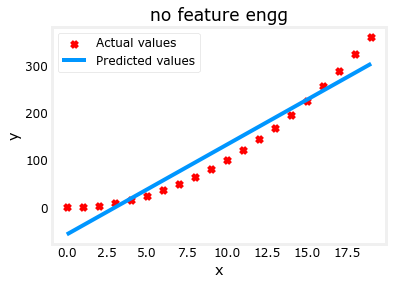

In [5]:
x, X = get_X()
y = 1 + x**2

model_w, model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-2)
plot_graph(x, y, X, model_w, model_b, 'no feature engg')

Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.], b: 0.0490


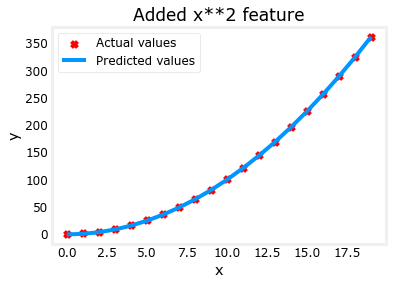

In [6]:
x, X = get_X()
y = 1 + x**2
X = X**2 #enginnering features
model_w, model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-5)
plot_graph(x, y, X, model_w, model_b, 'Added x**2 feature')

<h3>Selecting features</h3>

Iteration         0, Cost: 1.14029e+03
Iteration      1000, Cost: 3.28539e+02
Iteration      2000, Cost: 2.80443e+02
Iteration      3000, Cost: 2.39389e+02
Iteration      4000, Cost: 2.04344e+02
Iteration      5000, Cost: 1.74430e+02
Iteration      6000, Cost: 1.48896e+02
Iteration      7000, Cost: 1.27100e+02
Iteration      8000, Cost: 1.08495e+02
Iteration      9000, Cost: 9.26132e+01
w,b found by gradient descent: w: [0.08 0.54 0.03], b: 0.0106


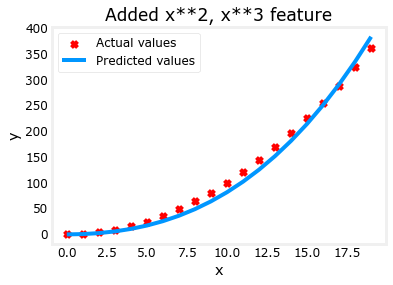

In [7]:
x = np.arange(0,20,1)
y = x**2

# Engineering the features
X = np.c_[x, x**2, x**3]

model_w, model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-7)
plot_graph(x, y, X, model_w, model_b, 'Added x**2, x**3 feature')

Alternate View

In [27]:
x = np.arange(0,20,1)
y = x**2

# Engineering features
X = np.c_[x, x**2, x**3]
X_features = ['x', 'x^2', 'x^3']

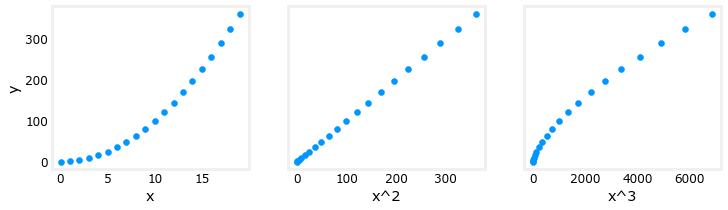

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(12,3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i], y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel('y')
plt.show()

Here, we can clearly see x**2 feature is mapped against target y is linear. Hence, linear regression can easily generate a model using this feature.

<h3>Scaling features</h3>

In [20]:
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]
print(f"Peak to peak range by column in Raw X: {np.ptp(X, axis=0)}")

X = zscore_normalize_features(X)
print(f"Peak to peak range by column in Normalized X: {np.ptp(X, axis=0)}")

Peak to peak range by column in Raw X: [  19  361 6859]
Peak to peak range by column in Normalized X: [3.3  3.18 3.28]


Iteration         0, Cost: 9.42147e+03
Iteration     10000, Cost: 3.90938e-01
Iteration     20000, Cost: 2.78389e-02
Iteration     30000, Cost: 1.98242e-03
Iteration     40000, Cost: 1.41169e-04
Iteration     50000, Cost: 1.00527e-05
Iteration     60000, Cost: 7.15855e-07
Iteration     70000, Cost: 5.09763e-08
Iteration     80000, Cost: 3.63004e-09
Iteration     90000, Cost: 2.58497e-10
w,b found by gradient descent: w: [5.27e-05 1.13e+02 8.43e-05], b: 123.5000


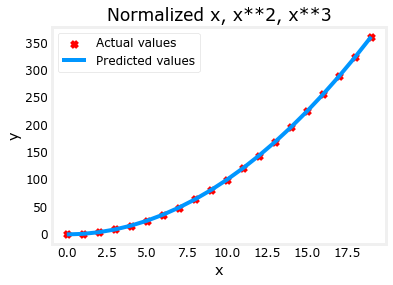

In [22]:
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X)
model_w, model_b = run_gradient_descent_feng(X, y, 100000, 1e-1)
plt.scatter(x, y, marker='x', c='r', label='Actual values'); plt.title('Normalized x, x**2, x**3')
plt.plot(x, X@model_w + model_b, label='Predicted values'); plt.xlabel('x'); plt.ylabel('y');  plt.legend();
plt.show()

<h3>Complex Features</h3>

Iteration         0, Cost: 2.20188e-01
Iteration    100000, Cost: 1.70074e-02
Iteration    200000, Cost: 1.27603e-02
Iteration    300000, Cost: 9.73032e-03
Iteration    400000, Cost: 7.56440e-03
Iteration    500000, Cost: 6.01412e-03
Iteration    600000, Cost: 4.90251e-03
Iteration    700000, Cost: 4.10351e-03
Iteration    800000, Cost: 3.52730e-03
Iteration    900000, Cost: 3.10989e-03
w,b found by gradient descent: w: [ -1.34 -10.    24.78   5.96 -12.49 -16.26  -9.51   0.59   8.7   11.94
   9.27   0.79 -12.82], b: -0.0073


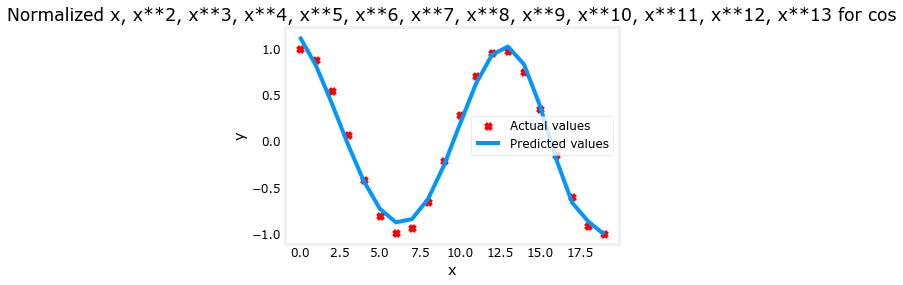

In [25]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X)

model_w, model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha=1e-1)
plt.scatter(x, y, marker='x', c='r', label='Actual values'); plt.title('Normalized x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13 for cos')
plt.plot(x, X@model_w + model_b, label='Predicted values'); plt.xlabel('x'); plt.ylabel('y'); plt.legend();
plt.show()

Here, we can see that linear regression can work on even complex and non-linear features as well using feature engineering. It is important to do feature scaling while doing feature engineering.